Author: Rishab Sudhir

# Neighborhoods by Race Demographics

Okay so based on the bedrooms/res_units (doesn't matter too much which one we use) maps we can now map age demographic data onto it to see which demographics are being affected by the changes. First lets get the neighborhood data previous notebooks and load in the age demographic data.

In [1]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np


bedrooms_neighborhoods_df = pd.read_csv('../Demographic Data/bedrooms_neighborhoods_gdf.csv')

# Convert the 'geometry' column from WKT string back to geometry objects
bedrooms_neighborhoods_df['geometry'] = bedrooms_neighborhoods_df['geometry'].apply(wkt.loads)

# Convert the pandas DataFrames into GeoDataFrames
bedrooms_neighborhoods_df = gpd.GeoDataFrame(bedrooms_neighborhoods_df, geometry='geometry')


In [2]:
display(bedrooms_neighborhoods_df.head())

,OBJECTID,BlockGr202,Shape_Leng,Shape_Area,geometry,point_count,bedrooms_diff,color
0,1,Allston,35808.619278,4.154760e+07,"POLYGON ((-71.12123 42.36775, -71.12069 42.367...",30,16.0,green
1,2,Back Bay,18815.103609,1.538724e+07,"POLYGON ((-71.07315 42.35554, -71.07302 42.355...",49,-8.0,red
2,3,Beacon Hill,11668.951169,7.891524e+06,"POLYGON ((-71.06291 42.36123, -71.06286 42.360...",138,2.0,green
3,4,Brighton,47051.804654,7.658156e+07,"POLYGON ((-71.13737 42.35876, -71.13747 42.358...",127,63.0,green
4,5,Charlestown,33910.754786,5.127021e+07,"POLYGON ((-71.06700 42.39401, -71.06741 42.393...",221,22.0,green


In [3]:
# Set the CRS for the GeoDataFrames to the known CRS
bedrooms_neighborhoods_df.crs = 'EPSG:4326'

In [4]:
race_demographic_data = pd.read_csv('../Demographic Data/Race_Demographics.csv')

In [5]:
display(race_demographic_data.head())

,Neighborhood,Total Population,White Alone,White Alone Percent,Black/African-American,Black/African-American Percent,Hispanic,Hispanic Percent,Asian alone,Asian alone Percent,Other Races,Other Races Percent
0,United States,"324,697,795","197,100,373",60.70%,"39,977,554",12.30%,"58,479,370",18.00%,"17,708,954",5.50%,"11,431,544",3.50%
1,Massachusetts,"6,850,553","4,903,539",71.60%,"473,181",6.90%,"809,179",11.80%,"449,793",6.60%,"214,861",3.10%
2,Boston,"684,379","304,524",44%,"155,096",22.70%,"135,757",19.80%,"65,613",9.60%,"23,389",3.40%
3,Allston,"19,261","9,839",51.10%,"1,099",5.70%,"2,586",13.40%,"4,811",25.00%,926,4.80%
4,Back Bay,"17,783","13,044",73.40%,761,4.30%,"1,715",9.60%,"1,917",10.80%,346,1.90%


In [6]:
# Checking the data types of the columns
race_demographic_data.dtypes

Neighborhood                      object
Total Population                  object
White Alone                       object
White Alone Percent               object
Black/African-American            object
Black/African-American Percent    object
Hispanic                          object
Hispanic Percent                  object
Asian alone                       object
Asian alone Percent               object
Other Races                       object
Other Races Percent               object
dtype: object

In [7]:
# Remove leading and trailing spaces from column names
race_demographic_data.columns = race_demographic_data.columns.str.strip()

In [8]:
# Checking the data types of the columns
race_demographic_data.dtypes

Neighborhood                      object
Total Population                  object
White Alone                       object
White Alone Percent               object
Black/African-American            object
Black/African-American Percent    object
Hispanic                          object
Hispanic Percent                  object
Asian alone                       object
Asian alone Percent               object
Other Races                       object
Other Races Percent               object
dtype: object

In [9]:
percent_columns = ['White Alone Percent', 'Black/African-American Percent', 'Hispanic Percent', 'Asian alone Percent', 'Other Races Percent']

for column in percent_columns:
    race_demographic_data[column] = pd.to_numeric(race_demographic_data[column].str.replace('%', '').str.strip(), errors='coerce')

# Confirm the changes
print(race_demographic_data.dtypes)


Neighborhood                       object
Total Population                   object
White Alone                        object
White Alone Percent               float64
Black/African-American             object
Black/African-American Percent    float64
Hispanic                           object
Hispanic Percent                  float64
Asian alone                        object
Asian alone Percent               float64
Other Races                        object
Other Races Percent               float64
dtype: object


In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Strip whitespace and convert to consistent case (e.g., uppercase) in the demographic DataFrame
race_demographic_data['Neighborhood'] = race_demographic_data['Neighborhood'].str.strip().str.upper()

# Do the same for the neighborhoods GeoDataFrame
bedrooms_neighborhoods_df['BlockGr202'] = bedrooms_neighborhoods_df['BlockGr202'].str.strip().str.upper()


# Find the modal age group by taking the idxmax of the percentage columns along the rows
race_columns = [col for col in race_demographic_data.columns if 'Percent' in col]
race_demographic_data['Modal_Race_Group'] = race_demographic_data[race_columns].idxmax(axis=1)

# Merge the modal race group data with the neighborhood GeoDataFrame
# Make sure the merge is being done in the right order and with the right column names
bedrooms_neighborhoods_df = bedrooms_neighborhoods_df.merge(race_demographic_data[['Neighborhood', 'Modal_Race_Group']], left_on='BlockGr202', right_on='Neighborhood', how='left')



In [11]:
display(bedrooms_neighborhoods_df)

,OBJECTID,BlockGr202,Shape_Leng,Shape_Area,geometry,point_count,bedrooms_diff,color,Neighborhood,Modal_Race_Group
0,1,ALLSTON,35808.619278,4.154760e+07,"POLYGON ((-71.12123 42.36775, -71.12069 42.367...",30,16.0,green,ALLSTON,White Alone Percent
1,2,BACK BAY,18815.103609,1.538724e+07,"POLYGON ((-71.07315 42.35554, -71.07302 42.355...",49,-8.0,red,BACK BAY,White Alone Percent
2,3,BEACON HILL,11668.951169,7.891524e+06,"POLYGON ((-71.06291 42.36123, -71.06286 42.360...",138,2.0,green,BEACON HILL,White Alone Percent
3,4,BRIGHTON,47051.804654,7.658156e+07,"POLYGON ((-71.13737 42.35876, -71.13747 42.358...",127,63.0,green,BRIGHTON,White Alone Percent
4,5,CHARLESTOWN,33910.754786,5.127021e+07,"POLYGON ((-71.06700 42.39401, -71.06741 42.393...",221,22.0,green,CHARLESTOWN,White Alone Percent
5,6,CHINATOWN,10843.828683,3.436019e+06,"POLYGON ((-71.05801 42.35235, -71.05817 42.352...",2,0.0,white,NaN,NaN
6,7,DORCHESTER,80692.139164,2.193038e+08,"POLYGON ((-71.05733 42.32804, -71.05720 42.328...",679,235.0,green,DORCHESTER,Black/African-American Percent
7,8,DOWNTOWN,32767.370822,2.159010e+07,"MULTIPOLYGON (((-71.06456 42.35238, -71.06472 ...",1,NaN,white,DOWNTOWN,White Alone Percent
8,9,EAST BOSTON,79266.383121,1.948618e+08,"POLYGON ((-71.00232 42.40094, -71.00188 42.400...",250,95.0,green,EAST BOSTON,Hispanic Percent
9,10,FENWAY,101396.628071,4.281357e+07,"POLYGON ((-71.12701 42.37284, -71.12669 42.372...",10,-1.0,red,FENWAY,White Alone Percent


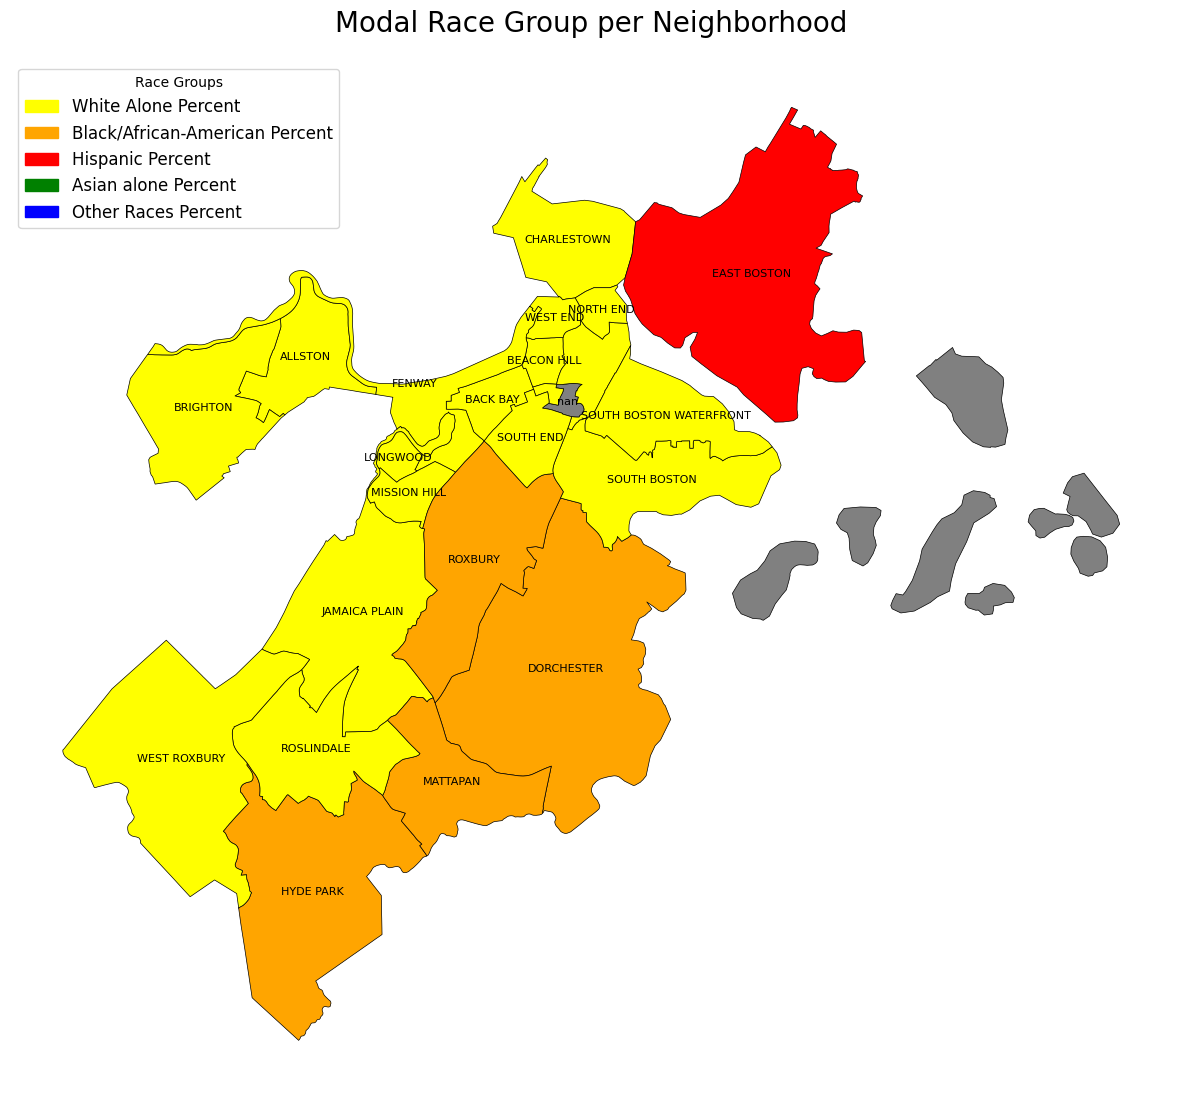

In [12]:


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry import Polygon

# Create a color map for the modal age group
color_map = {
    'White Alone Percent': 'yellow',
    'Black/African-American Percent': 'orange',
    'Hispanic Percent': 'red',
    'Asian alone Percent': 'green',
    'Other Races Percent': 'blue',
    'NaN': 'grey'  # Assign a default color for NaN values
}

# Map the modal age group to its corresponding color
bedrooms_neighborhoods_df['color'] = bedrooms_neighborhoods_df['Modal_Race_Group'].map(color_map)

# Replace NaN values in 'color' with the default color for NaN values
bedrooms_neighborhoods_df['color'].fillna(color_map['NaN'], inplace=True)

# Plot the map
fig, ax = plt.subplots(1, figsize=(15, 15))
bedrooms_neighborhoods_df.plot(ax=ax, color=bedrooms_neighborhoods_df['color'], edgecolor='black', linewidth=0.5)

# Create a patch (proxy artist) for each color map
patches = [mpatches.Patch(color=color, label=race_group) for race_group, color in color_map.items() if race_group != 'NaN']
plt.legend(handles=patches, title='Race Groups', loc='upper left', fontsize=12)

# Annotate the neighborhoods with their names
for idx, row in bedrooms_neighborhoods_df.iterrows():
    # Skip rows where the geometry is empty or invalid
    if isinstance(row['geometry'], Polygon):
        plt.annotate(text=row['Neighborhood'], 
                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                     horizontalalignment='center', verticalalignment='center', fontsize=8)

# Remove axis off
ax.axis('off')

# Add title
plt.title('Modal Race Group per Neighborhood', fontsize=20, y=1.02)


# Show the map
plt.show()



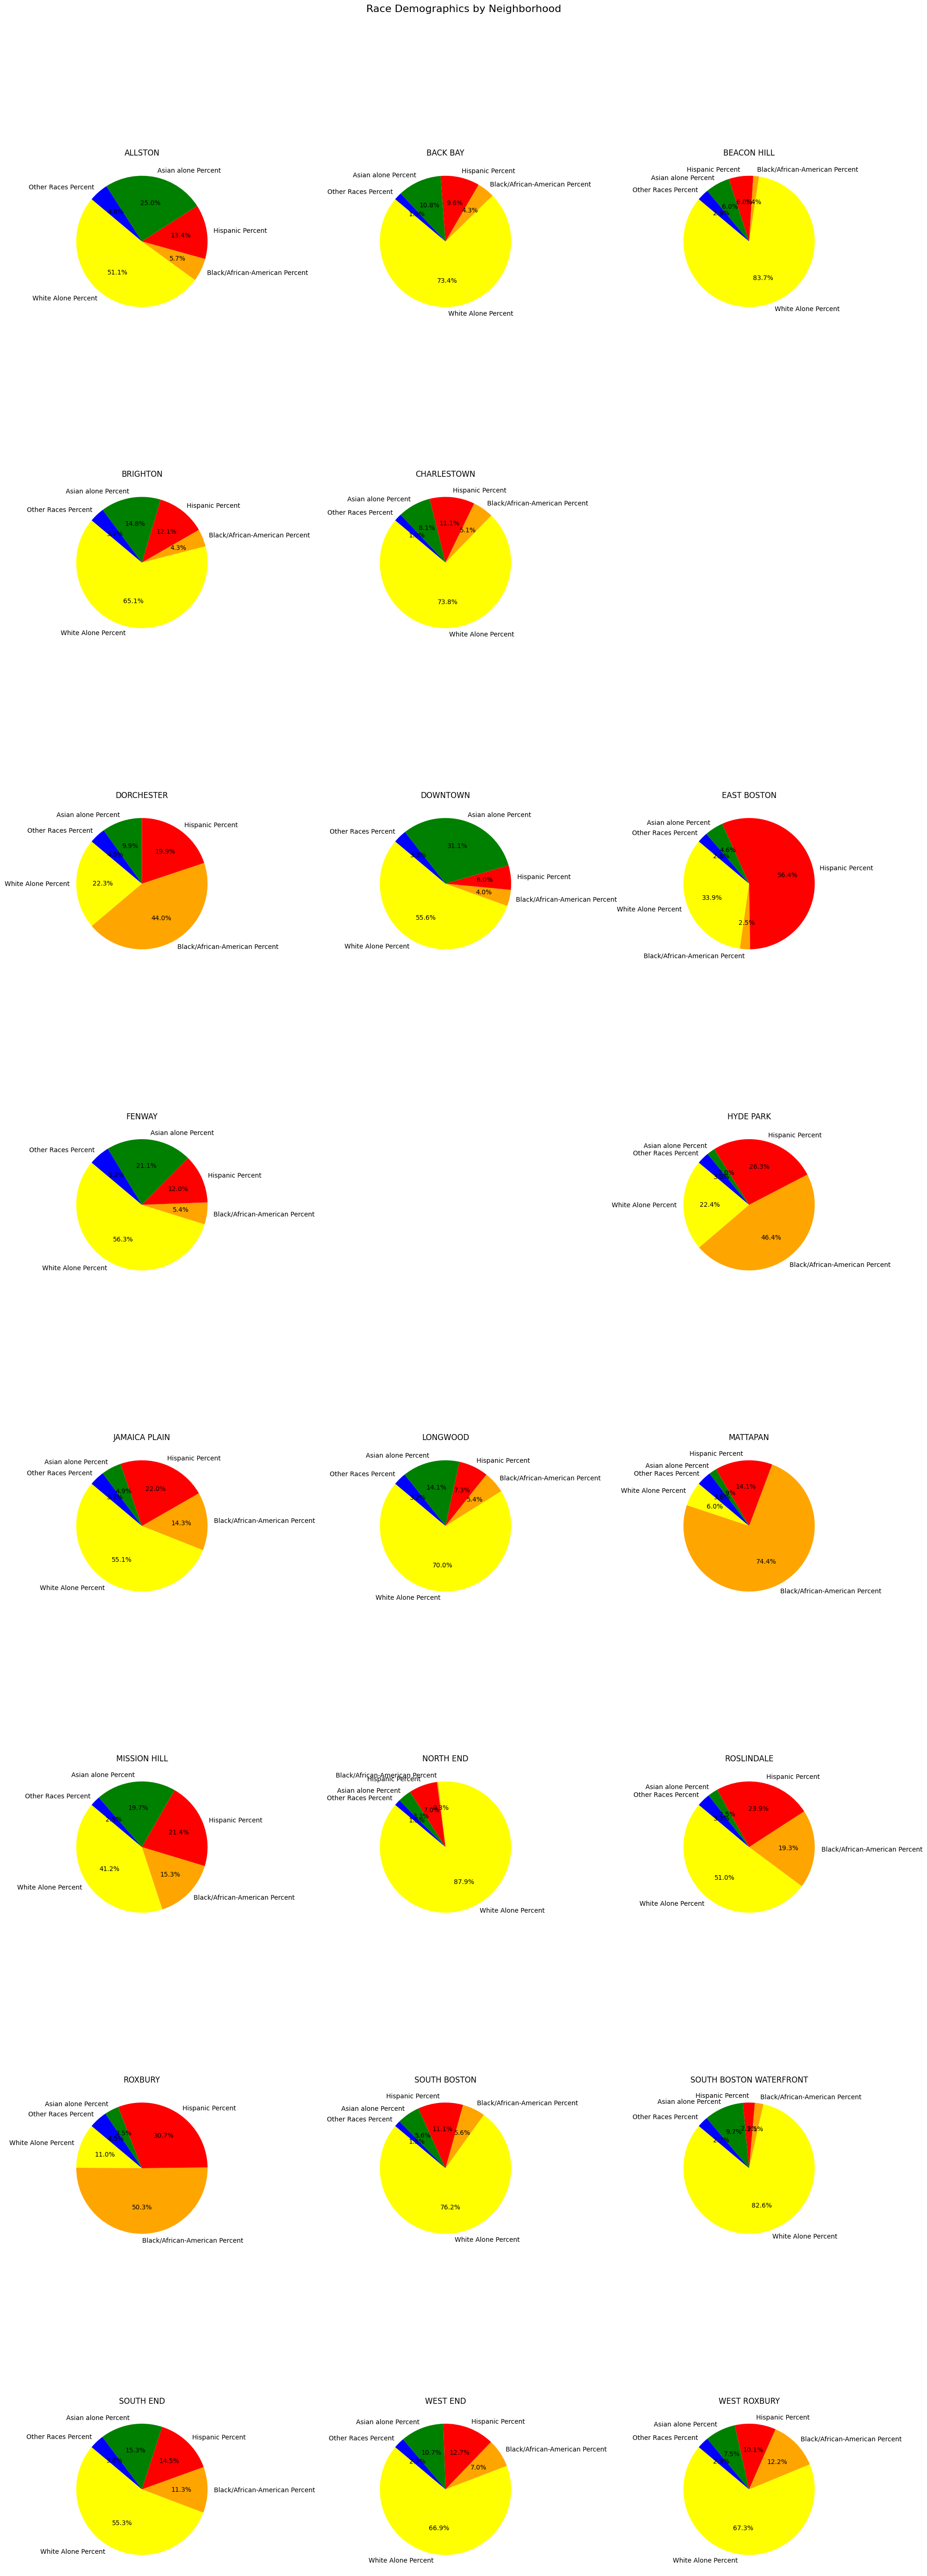

In [13]:
import matplotlib.pyplot as plt


# Define the categories and colors for the pie charts
race_categories = ['White Alone Percent', 'Black/African-American Percent', 'Hispanic Percent', 'Asian alone Percent', 'Other Races Percent']

colors = ['yellow', 'orange', 'red', 'green', 'blue']

# Determine the layout of the subplots
nrows = int(np.ceil(len(bedrooms_neighborhoods_df) / 3.0))
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 7))

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Plot a pie chart for each neighborhood
for idx, (ax, neighborhood) in enumerate(zip(axes_flat, bedrooms_neighborhoods_df['Neighborhood'])):
    # Get the age distribution for the current neighborhood
    distribution = race_demographic_data[race_demographic_data['Neighborhood'] == neighborhood][race_categories].values.flatten().tolist()
    
    # If the neighborhood has no data, continue to the next iteration
    if not distribution:
        ax.axis('off')  # Hide the axis if no data
        continue
    
    # Create the pie chart
    ax.pie(distribution, labels=race_categories, colors=colors, autopct='%1.1f%%', startangle=140)
    ax.set_title(neighborhood)

# Hide any unused axes
for ax in axes_flat[idx+1:]:
    ax.axis('off')

# Add an overall title
plt.suptitle('Race Demographics by Neighborhood', fontsize=16, y=1.02)

# Adjust layout to prevent overlap, you can fine-tune these parameters
# plt.subplots_adjust(hspace=0.2, wspace=0.5)



# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
